<a href="https://colab.research.google.com/github/molonepa/pneumonia_classifier/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone repo containing dataset and main notebook

In [7]:
! git clone https://github.com/molonepa/pneumonia_classifier.git

Cloning into 'pneumonia_classifier'...
remote: Enumerating objects: 5843, done.
remote: Total 5843 (delta 0), reused 0 (delta 0), pack-reused 5843
Receiving objects: 100% (5843/5843), 1.13 GiB | 30.47 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (5859/5859), done.


Import packages

In [0]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

Set path variables and print image counts

In [19]:
DATA_PATH = 'pneumonia_classifier/data'

TRAIN_DIR = os.path.join(DATA_PATH, 'train')
TEST_DIR = os.path.join(DATA_PATH, 'test')
VAL_DIR = os.path.join(DATA_PATH, 'val')

train_normal_dir = os.path.join(TRAIN_DIR, 'NORMAL')
train_pneumonia_dir = os.path.join(TRAIN_DIR, 'PNEUMONIA')
test_normal_dir = os.path.join(TEST_DIR, 'NORMAL')
test_pneumonia_dir = os.path.join(TEST_DIR, 'PNEUMONIA')
val_normal_dir = os.path.join(VAL_DIR, 'NORMAL')
val_pneumonia_dir = os.path.join(VAL_DIR, 'PNEUMONIA')

print('NORMAL train images: {}'.format(len(os.listdir(train_normal_dir))))
print('PNEUMONIA train images: {}'.format(len(os.listdir(train_pneumonia_dir))))
print('total train images: {}\n--'.format(len(os.listdir(train_normal_dir)) + len(os.listdir(train_pneumonia_dir))))

print('NORMAL test images: {}'.format(len(os.listdir(test_normal_dir))))
print('PNEUMONIA test images: {}'.format(len(os.listdir(test_pneumonia_dir))))
print('total train images: {}\n--'.format(len(os.listdir(test_normal_dir)) + len(os.listdir(test_pneumonia_dir))))

print('NORMAL val images: {}'.format(len(os.listdir(val_normal_dir))))
print('PNEUMONIA val images: {}'.format(len(os.listdir(val_pneumonia_dir))))
print('total val images: {}'.format(len(os.listdir(val_normal_dir)) + len(os.listdir(val_pneumonia_dir))))

NORMAL train images: 1341
PNEUMONIA train images: 3875
total train images: 5216
--
NORMAL test images: 234
PNEUMONIA test images: 390
total train images: 624
--
NORMAL val images: 8
PNEUMONIA val images: 8
total val images: 16


Convert images into floating point tensors using ```ImageDataGenerator``` from ```tf.keras``` and plot them


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


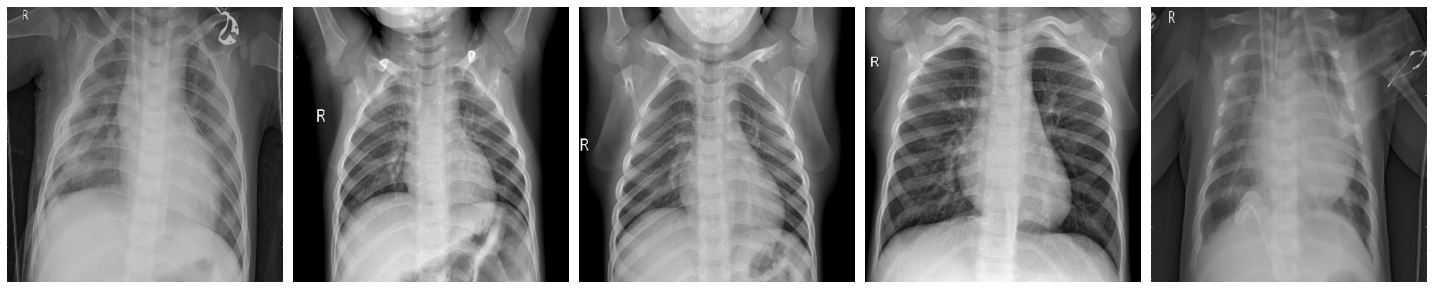

In [21]:
BATCH_SIZE = 64
NUM_EPOCHS = 15
IMG_HEIGHT = 500
IMG_WIDTH = 500

train_image_generator = ImageDataGenerator()
test_image_generator = ImageDataGenerator()
val_image_generator = ImageDataGenerator()

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, directory=TRAIN_DIR, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE, directory=TEST_DIR, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = val_image_generator.flow_from_directory(batch_size=BATCH_SIZE, directory=VAL_DIR, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

sample_training_images, _ = next(train_data_gen)

plotImages(sample_training_images[:5])

Model definition

In [22]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)           

Train

In [23]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(os.listdir(train_normal_dir)) + len(os.listdir(train_pneumonia_dir)) // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_data_gen,
    validation_steps=len(os.listdir(val_normal_dir)) + len(os.listdir(val_pneumonia_dir)) // BATCH_SIZE
)

Epoch 1/15
  82/1401 [>.............................] - 95s 1s/step - loss: 171.7318 - accuracy: 0.8367 - val_loss: 0.8511 - val_accuracy: 0.8125


In [17]:
import numpy as np
for f in (np.float32, np.float64, float):
    finfo = np.finfo(f)
    print(finfo.dtype, finfo.nexp, finfo.nmant)

float32 8 23
float64 11 52
float64 11 52
